# Data Analysis

### Import data

In [1]:
from helpers import show_normed_gray_image, output_to_img
from data_loader import Data_loader
import tensorflow as tf
from scipy.misc import imsave
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
loader_object = Data_loader()

In [3]:
loader_object.build_data()

specified target data loader:  (0, 512, 512, 1)
0 b'CXDI'
len : 132
1 b'Fluorospot_Compact_FD'
len : 3264
2 b'Essenta_DR_Compact'
len : 71
3 b'PCR_Eleva'
len : 10
4 b'DX-G'
len : 308
5 b'DigitalDiagnost'
len : 7095
check images properties
data size is :  (10880, 512, 512, 1)
Data is devided into class a: Fluorospot_Compact_FD and class b: DigitalDiagnost


print check

In [4]:
x_a = loader_object.processed_a
x_b = loader_object.processed_b

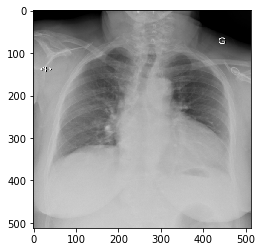

In [5]:
imgs = x_a
show_normed_gray_image(imgs,idx=1)

In [ ]:
imsave('/mnt/dataC/project_GANs/HUGxGAN_deep_learning/check_compression.png',x_a[0])

### Comparing distributions of the two main classes

In [27]:
import matplotlib.pyplot as plt
import numpy as np


x_mean_a = np.mean(x_a,axis=0)
x_std_a = np.std(x_a,axis=0)
mean_flat_a = np.squeeze(x_mean_a.reshape(1,(x_mean_a.shape[0]*x_mean_a.shape[1])))
std_flat_a = np.squeeze(x_std_a.reshape(1,(x_mean_a.shape[0]*x_mean_a.shape[1])))

x_mean_b = np.mean(x_b,axis=0)
x_std_b = np.std(x_b,axis=0)
mean_flat_b = np.squeeze(x_mean_b.reshape(1,(x_mean_b.shape[0]*x_mean_b.shape[1])))
std_flat_b = np.squeeze(x_std_b.reshape(1,(x_mean_b.shape[0]*x_mean_b.shape[1])))

visualization of the average image per pixel

In [15]:
import tensorflow as tf

def show_normed_gray_images(x_data, idx=0):
    
    with tf.Graph().as_default():
        init = (tf.global_variables_initializer(), tf.local_variables_initializer())  

        with tf.Session() as sess:
            sess.run(init)
            img = sess.run(tf.image.grayscale_to_rgb(x_data[idx]*255)).astype(np.uint8)

        plt.imshow(img)

class a: Fluorospot_Compact_FD

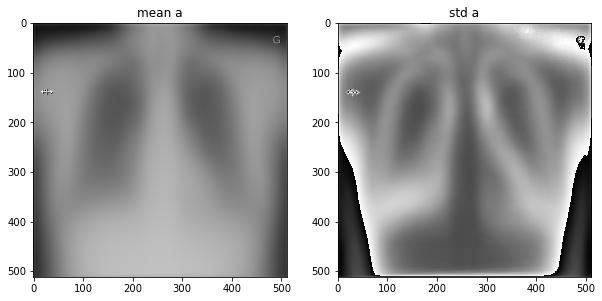

In [57]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
show_normed_gray_images(np.expand_dims(x_mean_a,0),idx=0)
plt.title('mean a')
plt.subplot(1,2,2)
show_normed_gray_images(np.expand_dims(x_std_a*5,0),idx=0)
plt.title('std a')
plt.show()

class b: DigitalDiagnost

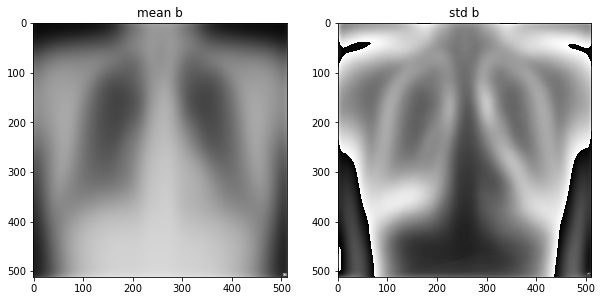

In [58]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
show_normed_gray_images(np.expand_dims(x_mean_b,0),idx=0)
plt.title('mean b')
plt.subplot(1,2,2)
show_normed_gray_images(np.expand_dims(x_std_b*5,0),idx=0)
plt.title('std b')
plt.show()

In [21]:
# save images
from helpers import *

with tf.Session() as sess:
    img_mean_b = output_to_img(sess, x_mean_b, 1)
    img_mean_a = output_to_img(sess, x_mean_a, 1)
    img_std_b = output_to_img(sess, x_std_b*5, 1)
    img_std_a = output_to_img(sess, x_std_a*5, 1)

imsave('/mnt/dataC/project_GANs/HUGxGAN_deep_learning/img_mean_b.jpg',img_mean_b)
imsave('/mnt/dataC/project_GANs/HUGxGAN_deep_learning/img_mean_a.jpg',img_mean_a)
imsave('/mnt/dataC/project_GANs/HUGxGAN_deep_learning/img_std_b.jpg',img_std_b)
imsave('/mnt/dataC/project_GANs/HUGxGAN_deep_learning/img_std_a.jpg',img_std_a)

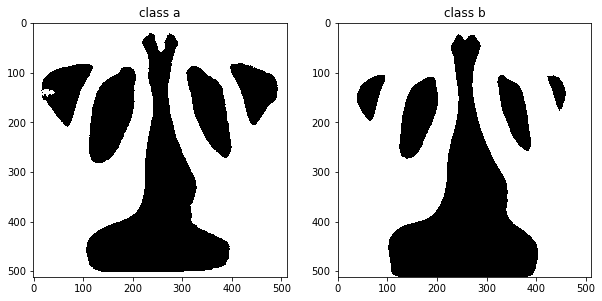

In [59]:
# AVREAGE CONTOURS

th = 987/10000

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
show_normed_gray_images(np.expand_dims(x_std_a>th,0),idx=0)
plt.title('class a')
plt.subplot(1,2,2)
show_normed_gray_images(np.expand_dims(x_std_b>th,0),idx=0)
plt.title('class b')
plt.show()

comparing the two classes

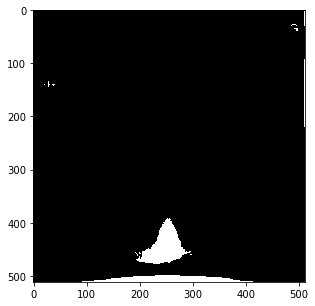

In [61]:
thr=1/3
contour_diff = np.abs(x_std_a-x_std_b)/(x_std_a+x_std_b)
plt.figure(figsize=(5,5))
show_normed_gray_images(np.expand_dims(contour_diff>thr,0),idx=0)
plt.show()

In [12]:
average_diff = np.abs(x_mean_a-x_mean_b)
std_summ = x_std_a+x_std_b
tstat_img = average_diff/std_summ

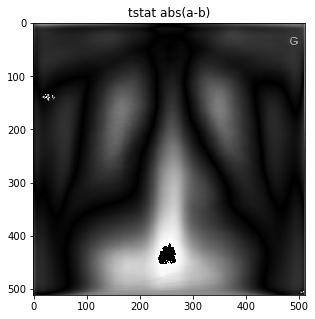

In [62]:
plt.figure(figsize=(5,5))
show_normed_gray_images(np.expand_dims(tstat_img,0),idx=0)
plt.title('tstat abs(a-b)')
plt.show()

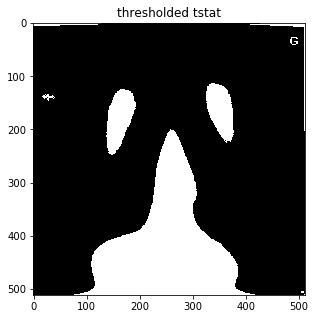

In [63]:
plt.figure(figsize=(5,5))
lim=1/3
show_normed_gray_images(np.expand_dims(tstat_img,0)>lim,idx=0)
plt.title('thresholded tstat')
plt.show()

histogram of average image representation

In [28]:
hist_a, bin_edges_a = np.histogram(mean_flat_a, 255, normed=True)
hist_b, bin_edges_b = np.histogram(mean_flat_b, 255, normed=True)

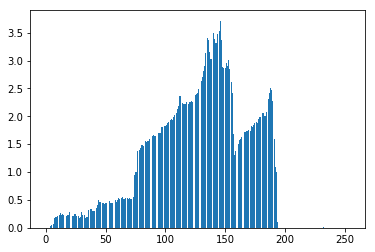

In [16]:
plt.bar(range(len(hist_a)),hist_a)
plt.show()

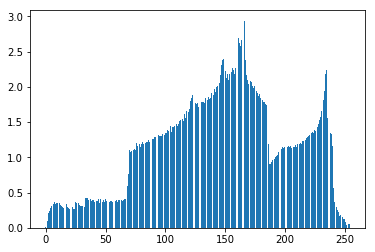

In [17]:
plt.bar(range(len(hist_b)),hist_b)
plt.show()

In [18]:
absolute_distance = np.mean(np.abs(hist_a, hist_b))
absolute_distance

1.0957215691543818

### Principal Component Analysis 

In [24]:
from matplotlib.mlab import PCA
from sklearn.preprocessing import StandardScaler

x_flat_a = x_a.reshape((x_a.shape[0], x_a.shape[1]*x_a.shape[2]*x_a.shape[3]))
x_flat_b = x_b.reshape((x_b.shape[0], x_b.shape[1]*x_b.shape[2]*x_b.shape[3]))

In [28]:
x_flat_a = StandardScaler().fit_transform(x_flat_a)
x_flat_b = StandardScaler().fit_transform(x_flat_b)

In [44]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=3)
principalComponents_a = pca.fit_transform(x_flat_a)
principalDf_a = pd.DataFrame(data = principalComponents_a
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [45]:
principalComponents_b = pca.fit_transform(x_flat_b)
principalDf_b = pd.DataFrame(data = principalComponents_b
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

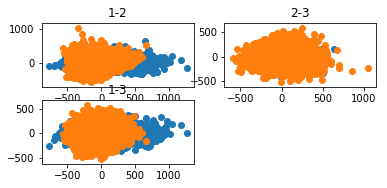

In [52]:
plt.subplot(3,2,1)
plt.scatter(x=principalDf_a['principal component 1'],y=principalDf_a['principal component 2'])
plt.scatter(x=principalDf_b['principal component 1'],y=principalDf_b['principal component 2'])
plt.title('1-2')
plt.subplot(3,2,2)
plt.scatter(x=principalDf_a['principal component 2'],y=principalDf_a['principal component 3'])
plt.scatter(x=principalDf_b['principal component 2'],y=principalDf_b['principal component 3'])
plt.title('2-3')
plt.subplot(3,2,3)
plt.scatter(x=principalDf_a['principal component 1'],y=principalDf_a['principal component 3'])
plt.scatter(x=principalDf_b['principal component 1'],y=principalDf_b['principal component 3'])
plt.title('1-3')
plt.show()

In [53]:
from mpl_toolkits.mplot3d import Axes3D

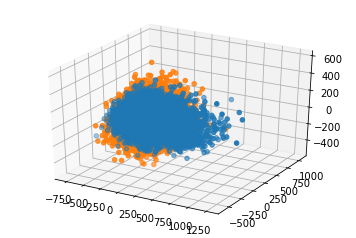

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principalDf_a['principal component 1'], 
           principalDf_a['principal component 2'],
           principalDf_a['principal component 3'])
ax.scatter(principalDf_b['principal component 1'], 
           principalDf_b['principal component 2'],
           principalDf_b['principal component 3'])
plt.show()

# Histogram matching

In [25]:
import numpy as np

def hist_match(source, template):
    """
    Adjust the pixel values of a grayscale image such that its histogram
    matches that of a target image

    Arguments:
    -----------
        source: np.ndarray
            Image to transform; the histogram is computed over the flattened
            array
        template: np.ndarray
            Template image; can have different dimensions to source
    Returns:
    -----------
        matched: np.ndarray
            The transformed output image
    """

    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    # get the set of unique pixel values and their corresponding indices and
    # counts
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                            return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    # take the cumsum of the counts and normalize by the number of pixels to
    # get the empirical cumulative distribution functions for the source and
    # template images (maps pixel value --> quantile)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # interpolate linearly to find the pixel values in the template image
    # that correspond most closely to the quantiles in the source image
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)

In [7]:
imgs_train_a = loader_object.a_train
imgs_train_b = loader_object.b_train

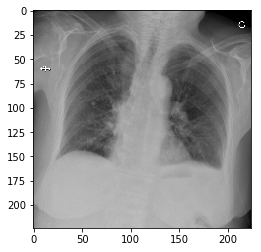

In [9]:
show_normed_gray_image(imgs_train_a,idx=0)

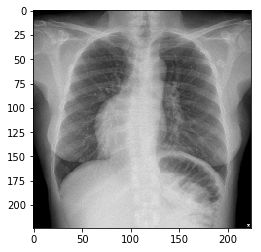

In [12]:
show_normed_gray_image(imgs_train_b,idx=5)

In [13]:
equalized_a = hist_match(imgs_train_a[0], imgs_train_b[0])

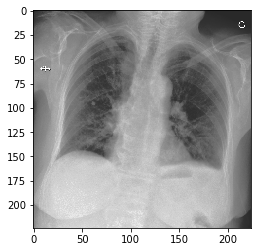

In [15]:
show_normed_gray_image(np.expand_dims(equalized_a,0),idx=0)

In [19]:
import tensorflow as tf
from scipy.misc import imsave

with tf.Graph().as_default():
        init = (tf.global_variables_initializer(), tf.local_variables_initializer())  

        with tf.Session() as sess:
            sess.run(init)
            img = sess.run(tf.image.grayscale_to_rgb(equalized_a*255)).astype(np.uint8)

In [21]:
imsave('/mnt/dataC/project_GANs/HUGxGAN_deep_learning/apply_code/cycle_GAN_basic/testing_hist_matching.jpg',img)

In [23]:
def wide_histogram_matching():
    imgs_matrix = []
    
    for i in range(0,min(len(x_a),len(x_b))):
        eq_a = hist_match(x_a[i], x_b[i])
        imgs_matrix.append(eq_a)
        
    return imgs_matrix

In [26]:
imgs_matrix = wide_histogram_matching()

In [27]:
# save to hdf5
path = '/mnt/dataC/project_GANs/HUGxGAN_deep_learning'+'/data.h5'

h5f = h5py.File(path, 'w')
h5f.create_dataset('X', data=np.array(imgs_matrix))
h5f.create_dataset('y_modelName', data=np.zeros(len(imgs_matrix)))
h5f.close()

In [2]:
path = '/mnt/dataC/project_GANs/HUGxGAN_deep_learning'+'/data.h5'
load_matched_file = Data_loader(_multiclass=False, _data_path=path)

In [3]:
load_matched_file.build_data()

specified target data loader:  (0, 224, 224, 1)
0 0.0
len : 3264
check images properties
data size is :  (3264, 224, 224, 1)


In [6]:
x_ = load_matched_file.processed_X

In [9]:
x_mean = np.mean(x_,axis=0)
x_std = np.std(x_,axis=0)
mean_flat = np.squeeze(x_mean.reshape(1,(x_mean.shape[0]*x_mean.shape[1])))
std_flat = np.squeeze(x_std.reshape(1,(x_mean.shape[0]*x_mean.shape[1])))

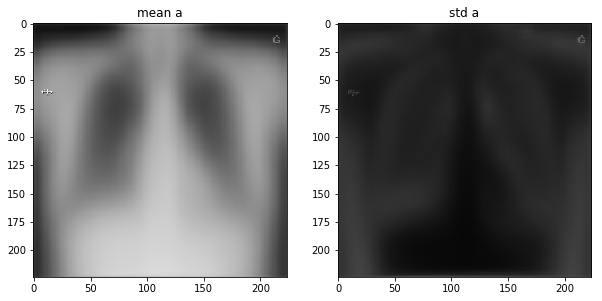

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
show_normed_gray_images(np.expand_dims(x_mean,0),idx=0)
plt.title('mean a')
plt.subplot(1,2,2)
show_normed_gray_images(np.expand_dims(x_std,0),idx=0)
plt.title('std a')
plt.show()

In [19]:
hist_x, bin_edges_x = np.histogram(mean_flat, 255, normed=True)

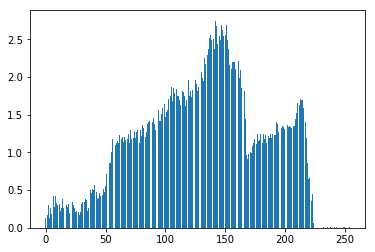

In [21]:
plt.bar(range(len(hist_x)),hist_x)
plt.show()

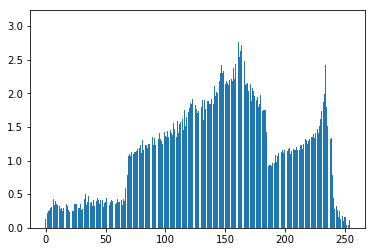

In [29]:
plt.bar(range(len(hist_b)),hist_b)
plt.show()

In [31]:
# save images
from helpers import *

with tf.Session() as sess:
    img_mean = output_to_img(sess, x_mean, 1)
    img_std = output_to_img(sess, x_std*5, 1)

imsave('/mnt/dataC/project_GANs/HUGxGAN_deep_learning/img_mean.jpg',img_mean)
imsave('/mnt/dataC/project_GANs/HUGxGAN_deep_learning/img_std.jpg',img_std)